In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install geopandas
!pip install matplotlib --upgrade

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import shapely

In [4]:
pd.set_option("display.precision", 3)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = '/content/drive/MyDrive/dataset/madison/'

## Load dataset

In [7]:
objects = pd.read_csv(path + '/input/objects_embeddings.csv')
objects = gpd.GeoDataFrame(objects, geometry=gpd.GeoSeries.from_wkt(objects['geometry']), crs=4326)
# objects[['embedding_ada']] = objects[['embedding_ada']].applymap(lambda s: np.array(eval(s)))
# objects[['embedding_large']] = objects[['embedding_large']].applymap(lambda s: np.array(eval(s)))
objects.head()

,objectid,geometry,source,geom_type,n_tokens,embedding_ada,embedding_large
0,"road_(6231530142, 3861040918)","LINESTRING (-89.4719 43.05, -89.472 43.05)",link,LineString,21,"[-0.014463399536907673, -0.004633771721273661,...","[0.01921754889190197, 0.01929466612637043, -0...."
1,"road_(53591318, 1179412798)","LINESTRING (-89.477 43.0693, -89.477 43.0681)",link,LineString,22,"[-0.014376881532371044, -0.004993679467588663,...","[0.021175693720579147, 0.015708766877651215, -..."
2,"road_(1178722373, 1178722211)","LINESTRING (-89.4626 43.0553, -89.4627 43.0554)",link,LineString,24,"[-0.015243860892951488, -0.004274553153663874,...","[0.011615517549216747, 0.02089725434780121, -0..."
3,"road_(53430628, 53468282)","LINESTRING (-89.3045 43.0246, -89.3053 43.0252)",link,LineString,24,"[-0.016633406281471252, -0.0014020365197211504...","[0.0076748463325202465, 0.030930323526263237, ..."
4,"road_(3444117858, 6680557104)","LINESTRING (-89.5081 43.0066, -89.5072 43.006)",link,LineString,23,"[-0.010978729464113712, -0.005506434012204409,...","[0.03258766606450081, 0.024168409407138824, -0..."


In [8]:

relations = pd.read_csv(path+'input/relations.csv', usecols=['subjectid', 'objectid', 'predicate', 'relate', 'idx'])
# relations.to_csv('/content/drive/MyDrive/dataset/madison/output/relations_update.csv', index=False)
# relations = pd.read_csv('/content/drive/MyDrive/dataset/madison/output/relations_update.csv')
relations.head()

,objectid,subjectid,predicate,relate,idx
0,"road_(53496379, 5657142535)","road_(5656899646, 53496379)",contains,101F00FF2,0
1,"road_(2634716954, 8997363243)","road_(8997363242, 2634716954)",contains,101F00FF2,1
2,poi_way/1134399612,poi_way/1134399613,contains,1F1FFFFF2,2
3,"road_(1998162788, 1998162839)",poi_way/257174438,contains,101FFFFF2,3
4,"road_(3420767254, 3590603510)",poi_way/287637061,contains,101FFFFF2,4


In [9]:
relations = pd.merge(relations, objects[['objectid', 'geometry', 'source', 'geom_type','n_tokens']].rename(columns={'objectid': 'subjectid',
                                                        'geometry': 'geometry_subject',
                                                        'source': 'source_subject',
                                                        'geom_type': 'geom_type_subject',
                                                          'n_tokens': 'n_tokens_subject'
                                                        }), on='subjectid', how='inner', sort=False)
relations = pd.merge(relations, objects[['objectid', 'geometry', 'source', 'geom_type', 'n_tokens']], on='objectid', how='inner', sort=False)
relations.head()

,objectid,subjectid,predicate,relate,idx,geometry_subject,source_subject,geom_type_subject,n_tokens_subject,geometry,source,geom_type,n_tokens
0,"road_(53496379, 5657142535)","road_(5656899646, 53496379)",contains,101F00FF2,0,"LINESTRING (-89.3397 43.0922, -89.3386 43.0922)",link,LineString,24,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922)",link,LineString,24
1,"road_(2634716954, 8997363243)","road_(8997363242, 2634716954)",contains,101F00FF2,1,"LINESTRING (-89.3554 43.1351, -89.3554 43.1357)",link,LineString,24,"LINESTRING (-89.3554 43.1357, -89.3554 43.1355)",link,LineString,24
2,poi_way/1134399612,poi_way/1134399613,contains,1F1FFFFF2,2,"LINESTRING (-89.4524 43.0716, -89.4521 43.0716...",poi,LineString,57,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",poi,LineString,46
3,"road_(1998162788, 1998162839)",poi_way/257174438,contains,101FFFFF2,3,"LINESTRING (-89.3392 43.0637, -89.3399 43.0641...",poi,LineString,134,"LINESTRING (-89.338 43.0659, -89.3378 43.0659)",link,LineString,23
4,"road_(3420767254, 3590603510)",poi_way/287637061,contains,101FFFFF2,4,"LINESTRING (-89.5168 43.0606, -89.5168 43.0616...",poi,LineString,57,"LINESTRING (-89.5175 43.0611, -89.5175 43.0607)",link,LineString,24


In [10]:
relations[(relations['geom_type_subject']=='Point')&(relations['geom_type']=='LineString')].sort_values(by=['n_tokens_subject', 'n_tokens']).iloc[0]

,3345
objectid,"road_(2633805462, 3423901632)"
subjectid,node_3752320724
predicate,disjoint
relate,FF0FFF102
idx,195
geometry_subject,POINT (-89.456 43.061)
source_subject,intersection
geom_type_subject,Point
n_tokens_subject,10
geometry,"LINESTRING (-89.459 43.0661, -89.459 43.066)"


In [11]:
relate_df = relations[['geom_type_subject', 'predicate', 'geom_type']].drop_duplicates().reset_index(drop=True)
relate_df['rid'] = relate_df.index
relate_df['output'] = '(' + relate_df['geom_type_subject'] + ',' + relate_df['predicate'] + ',' + relate_df['geom_type'] + ')'
relations = pd.merge(relations, relate_df, on=['geom_type_subject', 'predicate', 'geom_type'], how='left')
# relations = pd.merge(relations, relate_df, on=['geom_type_subject', 'predicate', 'geom_type'], how='left')

In [12]:
relations[['objectid', 'geom_type', 'geom_type_subject', 'predicate']].groupby(['geom_type_subject', 'predicate', 'geom_type']).count()

objectid
geom_type_subject predicate geom_type           
LineString        contains  LineString       225
                            Point            225
                  crosses   LineString       225
                            Polygon          225
                  disjoint  LineString       225
                            Point            225
                            Polygon          225
                  equals    LineString       225
                  overlaps  LineString       225
                  touches   LineString       225
                            Point            225
                            Polygon          225
                  within    LineString       225
                            Polygon          225
Point             disjoint  LineString       225
                            Point            225
                            Polygon          225
                  equals    Point            225
                  touches   LineString       225
                            Polygon          225
                  within    LineString       225
                            Polygon          225
Polygon           contains  LineString       225
                            Point            225
                            Polygon          225
                  crosses   LineString       225
                  disjoint  LineString       225
                            Point            225
                            Polygon          225
                  equals    Polygon          225
                  overlaps  Polygon          225
                  touches   LineString       225
                            Point            225
                            Polygon          225
                  within    Polygon          225

In [13]:
relations[['objectid', 'predicate']].groupby(['predicate']).count()

,objectid
predicate,
contains,1125
crosses,675
disjoint,2025
equals,675
overlaps,450
touches,1800
within,1125


In [14]:
intersections = pd.read_csv(path + 'input/intersections.csv')
intersections.head()

,objectid,geometry,subjectid,geometry_subject,geom_type_subject,geom_type,predicate,pid,relate
0,"road_(6231530142, 3861040918)","LINESTRING (-89.4719 43.05, -89.472 43.05)","road_(6231530142, 3861040918)","LINESTRING (-89.4719 43.05, -89.472 43.05)",LineString,LineString,equals,0,1FFF0FFF2
1,node_3455066029,POINT (-89.4513 43.0502),node_3455066029,POINT (-89.4513 43.0502),Point,Point,equals,0,0FFFFFFF2
2,node_3455066034,POINT (-89.451 43.0502),node_3455066034,POINT (-89.451 43.0502),Point,Point,equals,0,0FFFFFFF2
3,"road_(53509392, 53412067)","LINESTRING (-89.451 43.0476, -89.451 43.0484)","road_(53509392, 53412067)","LINESTRING (-89.451 43.0476, -89.451 43.0484)",LineString,LineString,equals,0,1FFF0FFF2
4,node_1142903570,POINT (-89.3634 43.0935),node_1142903570,POINT (-89.3634 43.0935),Point,Point,equals,0,0FFFFFFF2


## Train / Test split

In [15]:
relations_example = relations[relations['idx']>=200].reset_index(drop=True)

relations_test = pd.merge(pd.read_csv(path + 'relations_test_ordered.csv'),
                          relations[relations['idx']<40].reset_index(drop=True),
                          on=['subjectid', 'objectid'], how='left')

relations_train = relations[(relations['idx']>=40)&(relations['idx']<200)].reset_index(drop=True)

In [16]:
relations.head()

,objectid,subjectid,predicate,relate,idx,geometry_subject,source_subject,geom_type_subject,n_tokens_subject,geometry,source,geom_type,n_tokens,rid,output
0,"road_(53496379, 5657142535)","road_(5656899646, 53496379)",contains,101F00FF2,0,"LINESTRING (-89.3397 43.0922, -89.3386 43.0922)",link,LineString,24,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922)",link,LineString,24,0,"(LineString,contains,LineString)"
1,"road_(2634716954, 8997363243)","road_(8997363242, 2634716954)",contains,101F00FF2,1,"LINESTRING (-89.3554 43.1351, -89.3554 43.1357)",link,LineString,24,"LINESTRING (-89.3554 43.1357, -89.3554 43.1355)",link,LineString,24,0,"(LineString,contains,LineString)"
2,poi_way/1134399612,poi_way/1134399613,contains,1F1FFFFF2,2,"LINESTRING (-89.4524 43.0716, -89.4521 43.0716...",poi,LineString,57,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",poi,LineString,46,0,"(LineString,contains,LineString)"
3,"road_(1998162788, 1998162839)",poi_way/257174438,contains,101FFFFF2,3,"LINESTRING (-89.3392 43.0637, -89.3399 43.0641...",poi,LineString,134,"LINESTRING (-89.338 43.0659, -89.3378 43.0659)",link,LineString,23,0,"(LineString,contains,LineString)"
4,"road_(3420767254, 3590603510)",poi_way/287637061,contains,101FFFFF2,4,"LINESTRING (-89.5168 43.0606, -89.5168 43.0616...",poi,LineString,57,"LINESTRING (-89.5175 43.0611, -89.5175 43.0607)",link,LineString,24,0,"(LineString,contains,LineString)"


In [17]:
relations_test

,subjectid,objectid,predicate,relate,idx,geometry_subject,source_subject,geom_type_subject,n_tokens_subject,geometry,source,geom_type,n_tokens,rid,output
0,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",contains,101F00FF2,0,"LINESTRING (-89.3397 43.0922, -89.3386 43.0922)",link,LineString,24,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922)",link,LineString,24,0,"(LineString,contains,LineString)"
1,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",contains,101F00FF2,31,"LINESTRING (-89.3386 43.0922, -89.3397 43.0922)",link,LineString,24,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922)",link,LineString,24,0,"(LineString,contains,LineString)"
2,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",contains,101F00FF2,1,"LINESTRING (-89.3554 43.1351, -89.3554 43.1357)",link,LineString,24,"LINESTRING (-89.3554 43.1357, -89.3554 43.1355)",link,LineString,24,0,"(LineString,contains,LineString)"
3,poi_way/1134399613,poi_way/1134399612,contains,1F1FFFFF2,2,"LINESTRING (-89.4524 43.0716, -89.4521 43.0716...",poi,LineString,57,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",poi,LineString,46,0,"(LineString,contains,LineString)"
4,parcel_70920121012,poi_way/1134399612,contains,1F2FF1FF2,23,"POLYGON ((-89.4525 43.0706, -89.4525 43.0709, ...",parcel,Polygon,309,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",poi,LineString,46,22,"(Polygon,contains,LineString)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,polygon_parcel_081034401026,parcel_081034401026,equals,2FFF1FFF2,39,"POLYGON ((-89.2871 43.1138, -89.2878 43.1136, ...",equals_polygon,Polygon,69,"POLYGON ((-89.2878 43.1136, -89.2877 43.1139, ...",parcel,Polygon,58,29,"(Polygon,equals,Polygon)"
1396,polygon_parcel_71010107102,census_550250030012,within,2FF1FF212,37,"POLYGON ((-89.2894 43.0879, -89.2897 43.0879, ...",equals_polygon,Polygon,69,"POLYGON ((-89.2977 43.093, -89.2911 43.0922, -...",cbg,Polygon,88,34,"(Polygon,within,Polygon)"
1397,parcel_70826416476,polygon_parcel_70826420732,within,2FF11F212,17,"POLYGON ((-89.5091 43.0474, -89.509 43.0491, -...",parcel,Polygon,110,"POLYGON ((-89.5071 43.0483, -89.508 43.0477, -...",equals_polygon,Polygon,121,34,"(Polygon,within,Polygon)"
1398,parcel_71020301140,polygon_parcel_71020301140,within,2FF11F212,23,"POLYGON ((-89.3422 43.0504, -89.3424 43.0504, ...",parcel,Polygon,58,"POLYGON ((-89.3421 43.0513, -89.3422 43.0504, ...",equals_polygon,Polygon,69,34,"(Polygon,within,Polygon)"


In [18]:
data = relations_test[relations_test['predicate']!='disjoint'].reset_index(drop=True)

## Count the candidate triplets


### Without subject types


In [19]:
data_intersection_no_type = pd.merge(data[['predicate', 'objectid']], intersections[['subjectid', 'predicate', 'objectid']], on=['predicate', 'objectid'], how='inner')
data_intersection_no_type_cnt = data_intersection_no_type.groupby(['predicate', 'objectid']).count().rename(columns={'subjectid': 'count_no_type'}).reset_index()
data_intersection_no_type_cnt.sort_values(by='count_no_type', ascending=False)

,predicate,objectid,count_no_type
820,within,census_550250107025,848
808,within,census_550250026032,728
506,touches,census_550250002022,595
776,within,census_550250003012,417
892,within,polygon_census_550250026032,362
...,...,...,...
454,overlaps,line_poi_way/117103890,1
436,overlaps,census_550250016052,1
385,equals,poi_node/5636148034,1
384,equals,poi_node/10180980781,1


<Axes: >

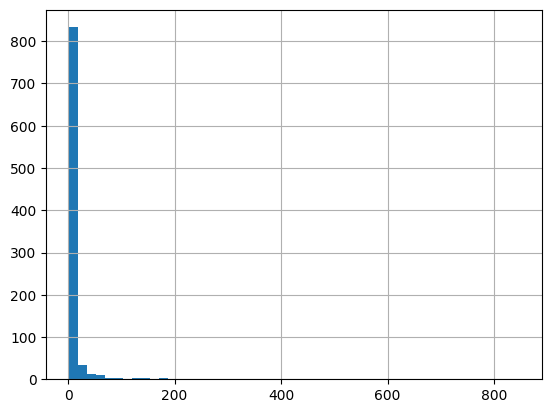

In [20]:

data_intersection_no_type_cnt['count_no_type'].hist(bins=50)

In [21]:

data_intersection_with_type = pd.merge(data[['geom_type_subject', 'predicate', 'objectid']], intersections[['subjectid', 'geom_type_subject', 'predicate', 'objectid']], on=['geom_type_subject', 'predicate', 'objectid'], how='inner')
data_intersection_with_type_cnt = data_intersection_with_type.groupby(['geom_type_subject', 'predicate', 'objectid']).count().rename(columns={ 'subjectid': 'count_with_type'}).reset_index()
data_intersection_with_type_cnt.sort_values(by='count_with_type', ascending=False)

,geom_type_subject,predicate,objectid,count_with_type
530,Point,within,census_550250107025,260
453,Point,touches,census_550250004011,164
234,LineString,touches,census_550250002022,152
448,Point,touches,census_550250002021,140
449,Point,touches,census_550250002022,138
...,...,...,...,...
438,Point,equals,node_5818083431,1
439,Point,equals,node_6404899260,1
441,Point,equals,node_8805215062,1
442,Point,equals,node_9134452591,1


## Compare the information in query

In [22]:
i = 0
for include_type in ["f", "all", "t"]:
    df = pd.read_csv(path+'/result/final/task2/Copy of task2_none_%s_subject.csv'%include_type)
    df['type'] = include_type
    df['id'] = i
    if i==0:
        res = df.copy()
        i += 1
    else:
        res = pd.concat([res, df], axis=0)

res.head()

,subjectid,objectid,predicate,idx,rank,dist,list,type,id,index
0,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",contains,0,39,0.272,"['poi_way/374898542', 'poi_way/297756530', 'ro...",f,0,NaN
1,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",contains,1,2,0.265,"['poi_way/374898542', 'road_(53496379, 5656899...",f,0,NaN
2,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",contains,2,2,0.282,"['line_poi_way/345753995', 'road_(8997363242, ...",f,0,NaN
3,poi_way/1134399613,poi_way/1134399612,contains,3,2,0.258,"['poi_way/1134399600', 'poi_way/1134399613', '...",f,0,NaN
4,parcel_70920121012,poi_way/1134399612,contains,4,3792,0.353,"['poi_way/1134399600', 'poi_way/1134399604', '...",f,0,NaN


In [23]:
res[['type', 'rank', 'id']].groupby(['type', 'id']).apply(lambda df: pd.Series({
    'MRR': (1./df['rank'].values).mean(),
    'Hits@5': (df['rank']<=5).mean(),
    'Hits@10': (df['rank']<=10).mean(),
    'Hits@20': (df['rank']<=20).mean()
})).sort_values(by='id').reset_index()

,type,id,MRR,Hits@5,Hits@10,Hits@20
0,f,0,0.081,0.131,0.161,0.194
1,all,1,0.065,0.091,0.117,0.156
2,t,1,0.152,0.212,0.260,0.290


## geometry generation

In [24]:
relations_test.loc[relations_test['predicate']!='disjoint', ['subjectid', 'objectid', 'geom_type_subject', 'geom_type']].reset_index(drop=True)

,subjectid,objectid,geom_type_subject,geom_type
0,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",LineString,LineString
1,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",LineString,LineString
2,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",LineString,LineString
3,poi_way/1134399613,poi_way/1134399612,LineString,LineString
4,parcel_70920121012,poi_way/1134399612,Polygon,LineString
...,...,...,...,...
1035,polygon_parcel_081034401026,parcel_081034401026,Polygon,Polygon
1036,polygon_parcel_71010107102,census_550250030012,Polygon,Polygon
1037,parcel_70826416476,polygon_parcel_70826420732,Polygon,Polygon
1038,parcel_71020301140,polygon_parcel_71020301140,Polygon,Polygon


In [25]:
df

,index,subjectid,objectid,predicate,idx,rank,dist,list,type,id
0,0,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",contains,0,3,0.205,"['road_(5657142535, 53496379)', 'road_(5349637...",t,1
1,1,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",contains,1,1,0.196,"['road_(53496379, 5656899646)', 'road_(5657142...",t,1
2,2,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",contains,2,1,0.211,"['road_(8997363242, 2634716954)', 'road_(26347...",t,1
3,3,poi_way/1134399613,poi_way/1134399612,contains,3,9,0.213,"['poi_way/1134399600', 'poi_way/1134399612', '...",t,1
4,4,parcel_70920121012,poi_way/1134399612,contains,4,311,0.233,"['parcel_60905452335', 'parcel_60905452406', '...",t,1
...,...,...,...,...,...,...,...,...,...,...
1035,1035,polygon_parcel_081034401026,parcel_081034401026,equals,1035,1,0.181,"['polygon_parcel_081034401026', 'parcel_810271...",t,1
1036,1036,polygon_parcel_71010107102,census_550250030012,within,1036,342,0.200,"['census_550250030012', 'polygon_parcel_610102...",t,1
1037,1037,parcel_70826416476,polygon_parcel_70826420732,within,1037,22,0.175,"['polygon_parcel_70826420732', 'census_5502500...",t,1
1038,1038,parcel_71020301140,polygon_parcel_71020301140,within,1038,2,0.167,"['polygon_parcel_71020301140', 'parcel_7102030...",t,1


In [26]:
i = 0
for s in ['zs', 'zs_check', 'fs', 'fs_neg']:
    df = pd.read_csv(path+'result/final/task2/Copy of geom_task2_q2d_%s.csv'%s)
    df['prompt'] = s
    df['id'] = i
    print(df.shape)
    df = pd.concat([df[['idx', 'prompt', 'text', 'id']],
                    relations_test.loc[relations_test['predicate']!='disjoint', ['subjectid', 'objectid','predicate', 'geom_type_subject', 'geom_type']].reset_index(drop=True)],
                   axis=1)
    if i==0:
        res = df.copy()

    else:
        res = pd.concat([res, df], axis=0)
    i += 1
res.head()

(1040, 5)
(1040, 5)
(1040, 5)
(1040, 5)


,idx,prompt,text,id,subjectid,objectid,predicate,geom_type_subject,geom_type
0,0,zs,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922...",0,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",contains,LineString,LineString
1,1,zs,"LINESTRING (-89.3385 43.0922, -89.3388 43.0922)",0,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",contains,LineString,LineString
2,2,zs,"LINESTRING (-89.3554 43.1358, -89.3554 43.1354)",0,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",contains,LineString,LineString
3,3,zs,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",0,poi_way/1134399613,poi_way/1134399612,contains,LineString,LineString
4,4,zs,"POLYGON ((-89.4525 43.0714, -89.4520 43.0714, ...",0,parcel_70920121012,poi_way/1134399612,contains,Polygon,LineString


In [27]:
from shapely import wkt
def load_wkt(s):
    try:
        return wkt.loads(s)

    except:
        return False

In [28]:
res['geometry'] = res['text'].apply(load_wkt)
res[['geometry', 'prompt', 'id']].groupby(['prompt', 'id']).apply(lambda df: pd.Series({'wkt': np.sum(df['geometry']!=False)/df.shape[0],
                                                                                        'non_wkt': np.sum(df['geometry']==False)})).reset_index().sort_values(by='id')

,prompt,id,wkt,non_wkt
2,zs,0,0.999,1.0
3,zs_check,1,0.998,2.0
0,fs,2,0.996,4.0
1,fs_neg,3,0.997,3.0


In [29]:
np.sum(res['geometry']!=False), res.shape

(4150, (4160, 10))

In [30]:
res_valid = gpd.GeoDataFrame(res[(res['geometry']!=False)], geometry='geometry', crs=4326)

res_valid = pd.merge(res_valid[['id', 'prompt', 'subjectid', 'objectid', 'predicate', 'geometry']], objects[['objectid', 'geom_type']].rename(columns={"objectid": 'subjectid',
                                                                                                                                'geom_type': 'geom_type_subject'}), on='subjectid', how='inner')
res_valid = pd.merge(res_valid, objects[['objectid', 'geometry']], on='objectid', how='inner')

res_valid.head()

,id,prompt,subjectid,objectid,predicate,geometry_x,geom_type_subject,geometry_y
0,0,zs,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",contains,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922...",LineString,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922)"
1,0,zs,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",contains,"LINESTRING (-89.3385 43.0922, -89.3388 43.0922)",LineString,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922)"
2,0,zs,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",contains,"LINESTRING (-89.3554 43.1358, -89.3554 43.1354)",LineString,"LINESTRING (-89.3554 43.1357, -89.3554 43.1355)"
3,0,zs,poi_way/1134399613,poi_way/1134399612,contains,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",LineString,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715..."
4,0,zs,parcel_70920121012,poi_way/1134399612,contains,"POLYGON ((-89.4525 43.0714, -89.452 43.0714, -...",Polygon,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715..."


In [31]:
res_valid['geom_type_label'] = res_valid['geometry_x'].geom_type
res_valid['geom_type'] = res_valid['geometry_y'].geom_type

res_valid.head()

,id,prompt,subjectid,objectid,predicate,geometry_x,geom_type_subject,geometry_y,geom_type_label,geom_type
0,0,zs,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",contains,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922...",LineString,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922)",LineString,LineString
1,0,zs,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",contains,"LINESTRING (-89.3385 43.0922, -89.3388 43.0922)",LineString,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922)",LineString,LineString
2,0,zs,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",contains,"LINESTRING (-89.3554 43.1358, -89.3554 43.1354)",LineString,"LINESTRING (-89.3554 43.1357, -89.3554 43.1355)",LineString,LineString
3,0,zs,poi_way/1134399613,poi_way/1134399612,contains,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",LineString,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",LineString,LineString
4,0,zs,parcel_70920121012,poi_way/1134399612,contains,"POLYGON ((-89.4525 43.0714, -89.452 43.0714, -...",Polygon,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",Polygon,LineString


In [32]:
res_valid[['geom_type_label', 'geom_type_subject', 'prompt', 'id']].groupby(['prompt', 'id']).apply(lambda df: pd.Series({
    'type_match': np.sum(df['geom_type_label']==df['geom_type_subject'])/df.shape[0],
    'not_match': np.sum(df['geom_type_label']!=df['geom_type_subject'])
})).reset_index().sort_values(by='id')

,prompt,id,type_match,not_match
2,zs,0,1.0,0.0
3,zs_check,1,1.0,0.0
0,fs,2,1.0,0.0
1,fs_neg,3,1.0,0.0


In [33]:
res_valid[res_valid['geom_type_label']!=res_valid['geom_type_subject']].head()

,id,prompt,subjectid,objectid,predicate,geometry_x,geom_type_subject,geometry_y,geom_type_label,geom_type


In [34]:
res_valid['match_geom_type'] = res_valid['geom_type_subject']==res_valid['geom_type_label']
np.sum(res_valid['match_geom_type']==False)

0

In [35]:
res_valid[['match_geom_type', 'prompt']].groupby('prompt').sum()

,match_geom_type
prompt,
fs,1036
fs_neg,1037
zs,1039
zs_check,1038


In [36]:
predicates = [
                        'overlaps',
                        'crosses',
                        'touches',
                        'within',
                        'contains',
              'geom_equals'

]
res_valid['label'] ='disjoint'

i = 0
for rel in predicates:
  f = getattr(res_valid['geometry_x'].make_valid(), rel)
  has_rel = f(res_valid['geometry_y'].make_valid(), align=False)
  if rel!='geom_equals':
      res_valid.loc[has_rel, 'label'] = rel
  else:
      res_valid.loc[has_rel, 'label'] = 'equals'


res_valid.head()

,id,prompt,subjectid,objectid,predicate,geometry_x,geom_type_subject,geometry_y,geom_type_label,geom_type,match_geom_type,label
0,0,zs,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",contains,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922...",LineString,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922)",LineString,LineString,True,contains
1,0,zs,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",contains,"LINESTRING (-89.3385 43.0922, -89.3388 43.0922)",LineString,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922)",LineString,LineString,True,contains
2,0,zs,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",contains,"LINESTRING (-89.3554 43.1358, -89.3554 43.1354)",LineString,"LINESTRING (-89.3554 43.1357, -89.3554 43.1355)",LineString,LineString,True,contains
3,0,zs,poi_way/1134399613,poi_way/1134399612,contains,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",LineString,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",LineString,LineString,True,equals
4,0,zs,parcel_70920121012,poi_way/1134399612,contains,"POLYGON ((-89.4525 43.0714, -89.452 43.0714, -...",Polygon,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",Polygon,LineString,True,contains


In [37]:

res_valid[res_valid['label']=='disjoint']

,id,prompt,subjectid,objectid,predicate,geometry_x,geom_type_subject,geometry_y,geom_type_label,geom_type,match_geom_type,label
134,0,zs,poi_way/1135060630,poi_way/28773321,crosses,"LINESTRING (-89.305 43.124, -89.305 43.127)",LineString,"LINESTRING (-89.3061 43.1259, -89.3053 43.1257...",LineString,LineString,True,disjoint
135,0,zs,node_10580933543,poi_way/28773321,within,POINT (-89.3055 43.1245),Point,"LINESTRING (-89.3061 43.1259, -89.3053 43.1257...",Point,LineString,True,disjoint
146,0,zs,poi_way/1135060641,poi_way/1135060557,crosses,"LINESTRING (-89.3062 43.1251, -89.3064 43.1252)",LineString,"LINESTRING (-89.3066 43.125, -89.306 43.1249, ...",LineString,LineString,True,disjoint
149,0,zs,poi_way/232698245,node_3455066661,contains,"LINESTRING (-90 43, -89 43)",LineString,POINT (-89.4665 43.0558),LineString,Point,True,disjoint
154,0,zs,node_6090145355,poi_way/1134399595,within,POINT (-89.4521 43.07335),Point,"LINESTRING (-89.452 43.0734, -89.4523 43.0734,...",Point,LineString,True,disjoint
...,...,...,...,...,...,...,...,...,...,...,...,...
3935,3,fs_neg,node_1706427666,poi_way/158450282,within,POINT (-89.355 43.098),Point,"LINESTRING (-89.357 43.0982, -89.3558 43.0991,...",Point,LineString,True,disjoint
3955,3,fs_neg,node_1222885318,poi_way/106220948,within,POINT (-89.353 43.046),Point,"LINESTRING (-89.3531 43.046, -89.353 43.0458, ...",Point,LineString,True,disjoint
3956,3,fs_neg,node_1315875410,poi_way/102715295,within,POINT (-89.3914 43.0682),Point,"LINESTRING (-89.3915 43.0682, -89.3913 43.0681...",Point,LineString,True,disjoint
3957,3,fs_neg,node_3026626763,poi_way/107463295,within,POINT (-89.434 43.0783),Point,"LINESTRING (-89.4336 43.0782, -89.4343 43.0783...",Point,LineString,True,disjoint


In [38]:
res_valid[['geom_type_label', 'geom_type', 'label', 'id']].drop_duplicates(subset=['geom_type_label', 'geom_type', 'label']).groupby(['geom_type_label', 'geom_type']).count()

label  id
geom_type_label geom_type            
LineString      LineString      7   7
                Point           3   3
                Polygon         4   4
Point           LineString      3   3
                Point           1   1
                Polygon         3   3
Polygon         LineString      4   4
                Point           3   3
                Polygon         6   6

In [39]:

# # from sklearn.metrics import classification_report, accuracy_score

# res_zero = res_all[(res_all['model']=='gpt4')&(res_all['prompt_mode']=='zero_shot')]

# res_zero_valid = res_zero[res_zero['pred']>-1]
# # res_zero_error = res_zero_valid[res_zero_valid['predicate']!=res_zero_valid['predicate_pred']]
error_cnt = res_valid[['geom_type_subject', 'geom_type', 'predicate', 'label']][res_valid['prompt']=='zs']
#  .groupby(['geom_type_subject', 'geom_type', 'predicate', 'predicate_pred'])).count().reset_index().rename(columns={'subjectid': 'count'})
# cnt = error_cnt[['geom_type_subject', 'geom_type', 'predicate', 'count']].groupby(['geom_type_subject', 'geom_type', 'predicate']).sum()
# error_cnt = pd.merge(error_cnt, cnt, on=['geom_type_subject', 'geom_type', 'predicate'], how='inner')
# error_cnt['weight'] = error_cnt['count_x'] / error_cnt['count_y']
# error_cnt = error_cnt.rename(columns={'predicate': 'source', 'predicate_pred': 'target'})
error_cnt.head()

,geom_type_subject,geom_type,predicate,label
0,LineString,LineString,contains,contains
1,LineString,LineString,contains,contains
2,LineString,LineString,contains,contains
3,LineString,LineString,contains,equals
4,Polygon,LineString,contains,contains


In [40]:

comb = error_cnt[['geom_type_subject', 'geom_type']].drop_duplicates().sort_values(by=['geom_type_subject', 'geom_type']).reset_index(drop=True)
comb

,geom_type_subject,geom_type
0,LineString,LineString
1,LineString,Point
2,LineString,Polygon
3,Point,LineString
4,Point,Point
5,Point,Polygon
6,Polygon,LineString
7,Polygon,Point
8,Polygon,Polygon


In [41]:
comb.shape


(9, 2)

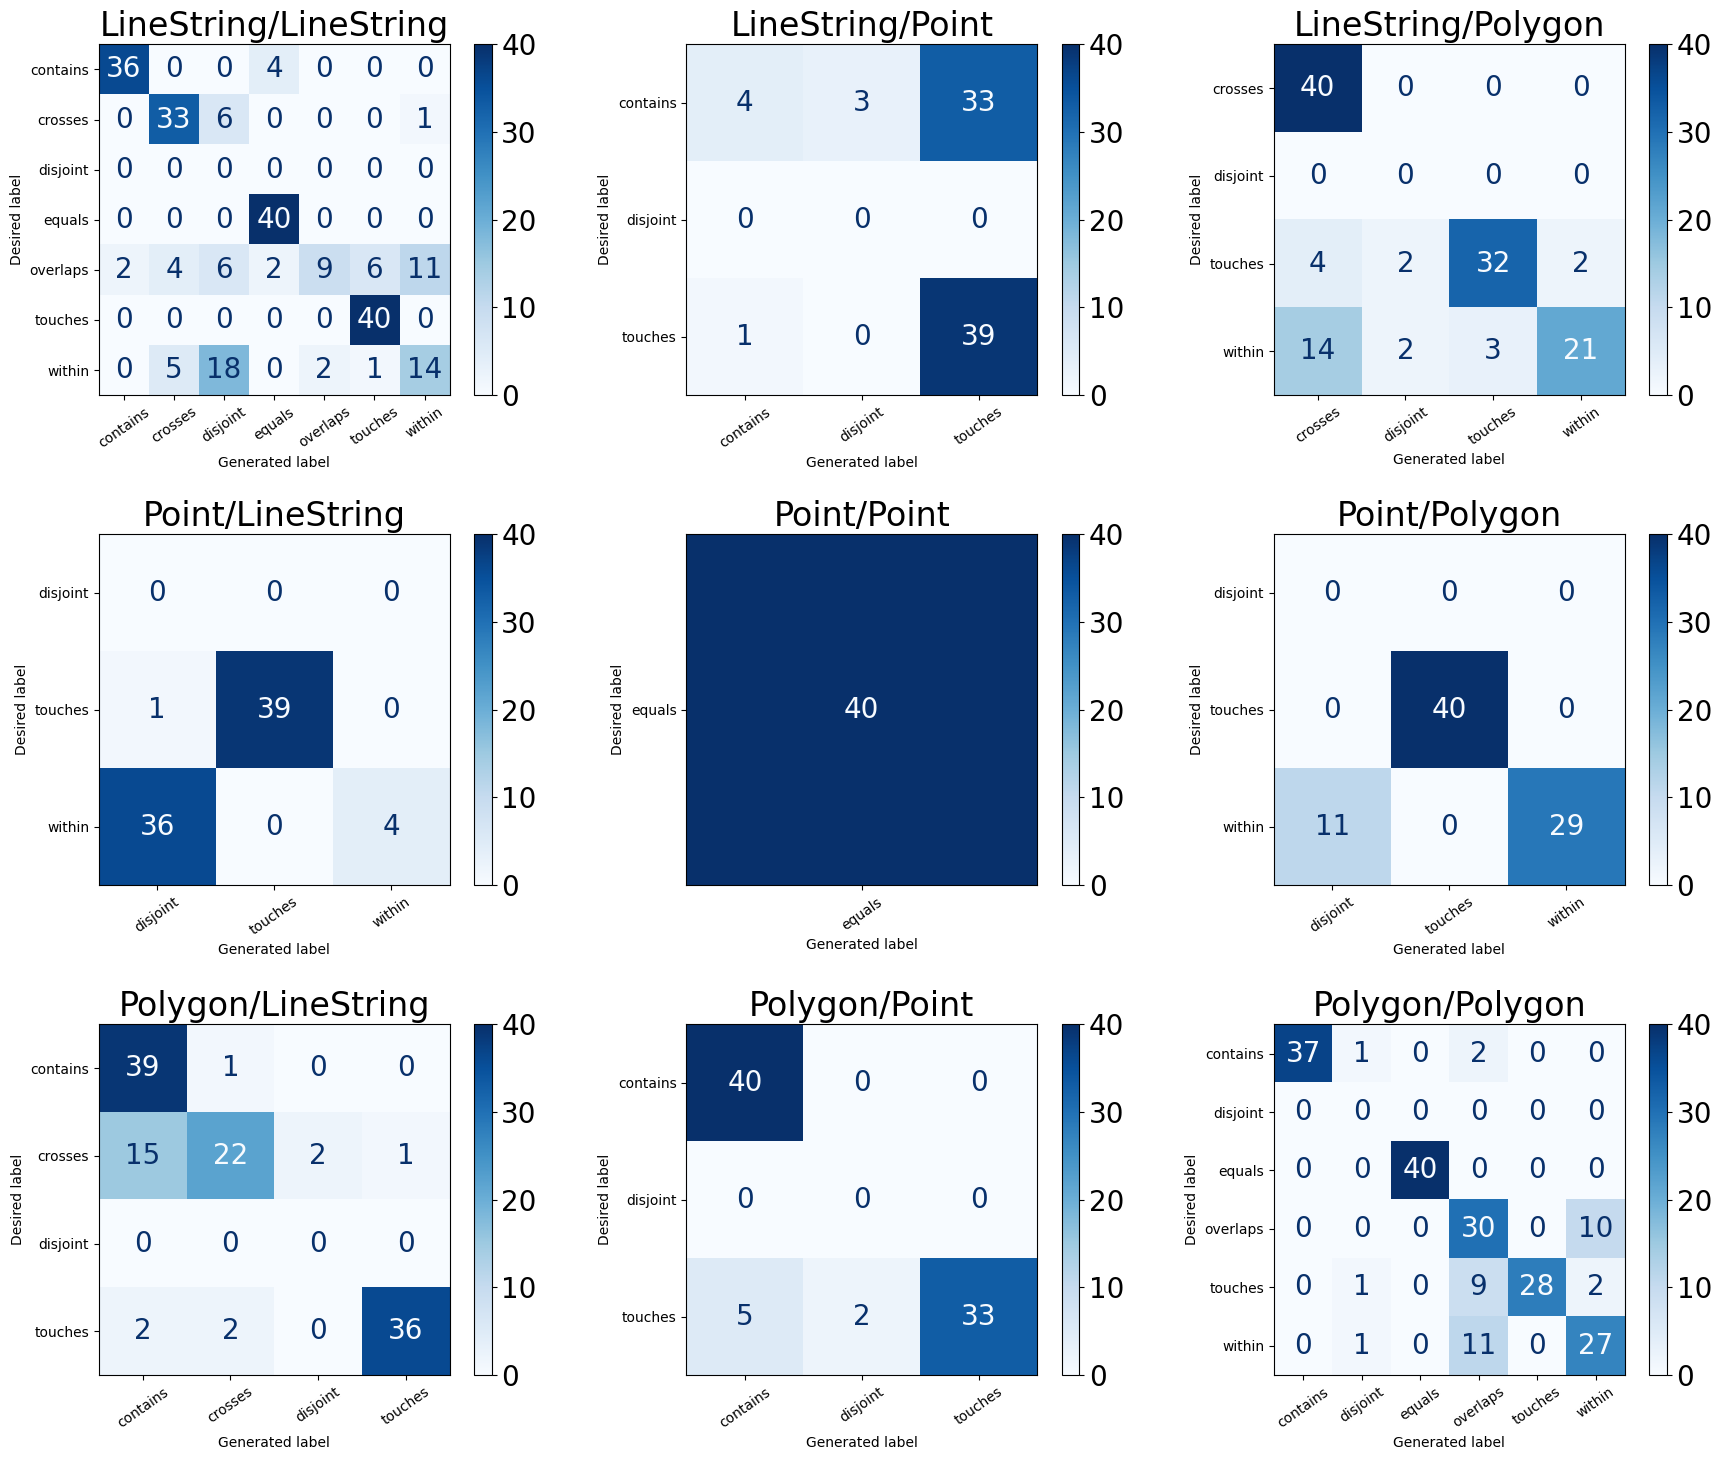

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(3, 3, figsize= (18, 15), tight_layout=True)
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'xtick.labelsize': 20})
plt.rcParams.update({'ytick.labelsize': 20})
for idx, row in comb.iterrows():
    xx = int(idx//3)
    yy = int(idx%3)

    error_cnt_comb = error_cnt[(error_cnt['geom_type_subject']==row['geom_type_subject'])&
                           (error_cnt['geom_type']==row['geom_type'])]
    cm = confusion_matrix(error_cnt_comb['predicate'], error_cnt_comb['label'],
                          labels=sorted(list(set(error_cnt_comb['label']))))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sorted(list(set(error_cnt_comb['label']))),
                                 )
    disp.plot(cmap=plt.cm.Blues, ax=ax[xx][yy])
    disp.im_.set_clim(0, 40)
    ax[xx][yy].tick_params(axis='x', rotation=35)
    ax[xx][yy].set_xlabel('Generated label')
    ax[xx][yy].set_ylabel('Desired label')
    ax[xx][yy].set_title(row['geom_type_subject']+'/'+row['geom_type'])
    # plt.savefig(path+'result/final/V1/%s_%s.png'%(row['geom_type_subject'], row['geom_type']))

#     G = nx.from_pandas_edgelist(error_cnt_comb, edge_attr=True, create_using=nx.DiGraph())

#     for edge in G.edges().values():
#         edge["penwidth"] = round(1 + edge["weight"]**2 * 5, 2)
#         edge["arrowsize"] = .3

#     # for node in G.nodes().values():
#     #     node['fontsize'] = 18

#     p = nx.drawing.nx_pydot.to_pydot(G)
#     p.write_png(path+'result/final/V1/%s_%s.png'%(row['geom_type_subject'], row['geom_type']))
#     # ax[xx][yy].set_title(row['geom_type_subject']+'/'+row['geom_type'])

# #
# plt.savefig(path+'/result/final/V1/task2_cng_matrix.png', dpi=300, bbox_inches='tight')

In [43]:
sample_relations = (res_valid[['geometry_x', 'geometry_y', 'label', 'predicate']][(res_valid['geom_type_label']=='LineString')&
 (res_valid['geom_type']=='LineString')&
                                                                                  (res_valid['label']==res_valid['predicate'])]
                    .sample(frac=1, random_state=20) # 0 #10
                    .drop_duplicates(subset='label').reset_index(drop=True))
sample_relations.shape[0]

6

In [44]:
sample_relations['geometry_x'].astype(str).values.tolist()

['LINESTRING (-89.3946 43.03, -89.3946 43.0299)',
 'LINESTRING (-89.4997 43.0085, -89.4998 43.0085, -89.4999 43.0085)',
 'LINESTRING (-89.3473 43.0936, -89.3473 43.0941)',
 'LINESTRING (-89.4033 43.067, -89.404 43.067)',
 'LINESTRING (-89.2747 43.1678, -89.2739 43.1689, -89.273 43.1686, -89.2731 43.1684, -89.27294 43.1684, -89.2729 43.1684, -89.2735 43.1675, -89.2747 43.1678)',
 'LINESTRING (-89.5454 43.042, -89.5454 43.0425, -89.5439 43.0426, -89.5439 43.0429, -89.5435 43.0432, -89.5449 43.0437, -89.5468 43.0437, -89.5471 43.0431, -89.5476 43.0426, -89.5476 43.0417, -89.5454 43.0417)']

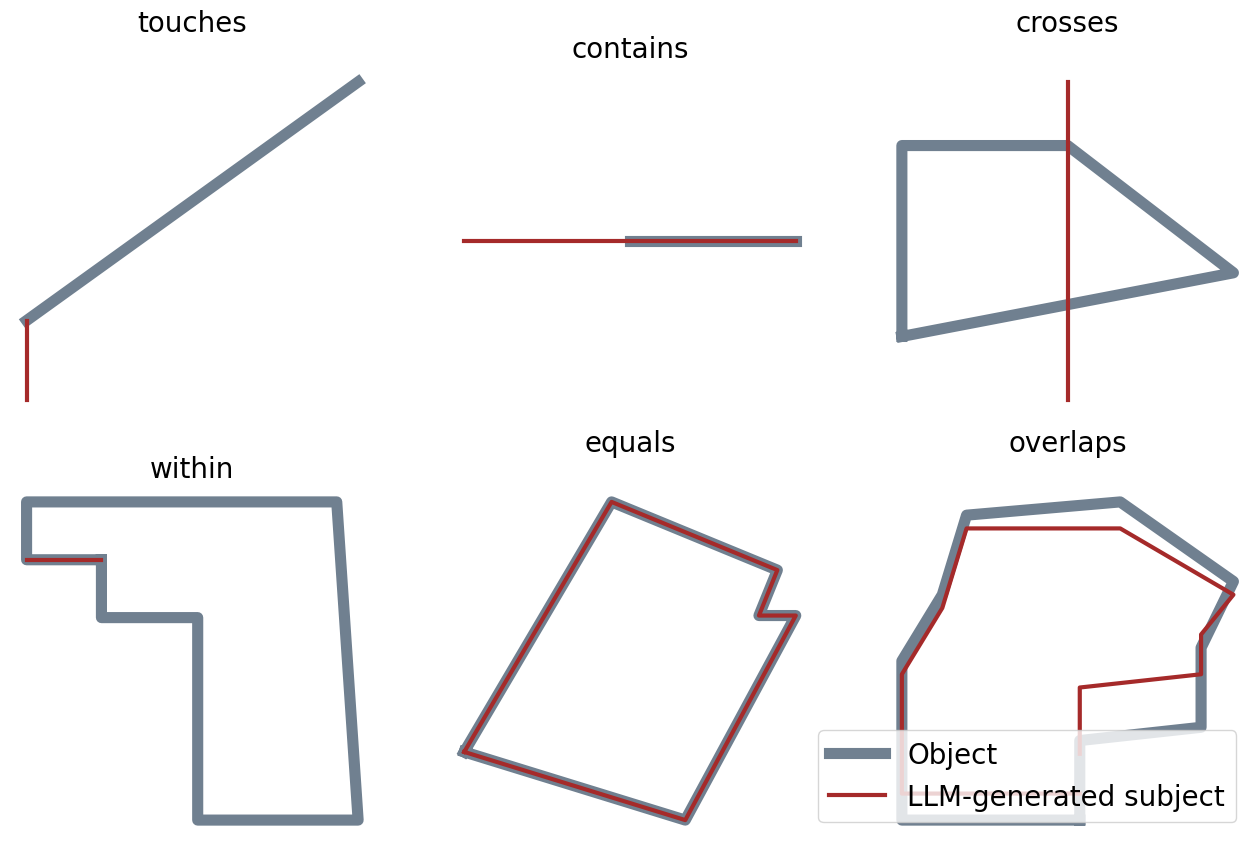

In [45]:
sample_relations = (res_valid[['geometry_x', 'geometry_y', 'label', 'predicate']][(res_valid['geom_type_label']=='LineString')&
 (res_valid['geom_type']=='LineString')&
                                                                                  (res_valid['label']==res_valid['predicate'])]
                    .sample(frac=1, random_state=20) # 0 #10
                    .drop_duplicates(subset='label').reset_index(drop=True))
sample_relations.shape[0]

sample_relations = gpd.GeoDataFrame(sample_relations, geometry='geometry_y', crs=4326)

fig, ax = plt.subplots(2,3, figsize=(16, 10))

for idx in range(sample_relations.shape[0]):
    xx = int(idx//3)
    yy = int(idx%3)

    df_y = sample_relations.iloc[idx:idx+1].get_coordinates()
    df_x = sample_relations.set_geometry('geometry_x').iloc[idx:idx+1].get_coordinates()
    predicate = sample_relations['label'].iloc[idx]

    # if predicate =='contains':
    #     # zorder1= 20
    #     ax[xx][yy].plot(df_x['x'], df_x['y'], lw=3,  color='brown', label='Pseudo subject')
    #     ax[xx][yy].plot(df_y['x'], df_y['y'], lw=8, color='slategrey', label='Object')
    #     # print(sample_relations.iloc[idx:idx+1])

    # else:
    ax[xx][yy].plot(df_y['x'], df_y['y'], lw=8, color='slategrey', label='Object')
    ax[xx][yy].plot(df_x['x'], df_x['y'], lw=3,  color='brown', label='LLM-generated subject')

    ax[xx][yy].set_title(predicate, {'fontsize':20})
    ax[xx][yy].axis('off')

# ax[1][3].plot([],[], color='slategrey', label='Object')
# ax[1][3].plot([],[], color='brown', label='Pseudo subject')
ax[1][2].legend(loc='lower right', fontsize=20)
# ax[1][2].axis('off')

# plt.savefig(path + 'result/final/V1/relations_line_line.png', dpi=300, bbox_inches='tight')

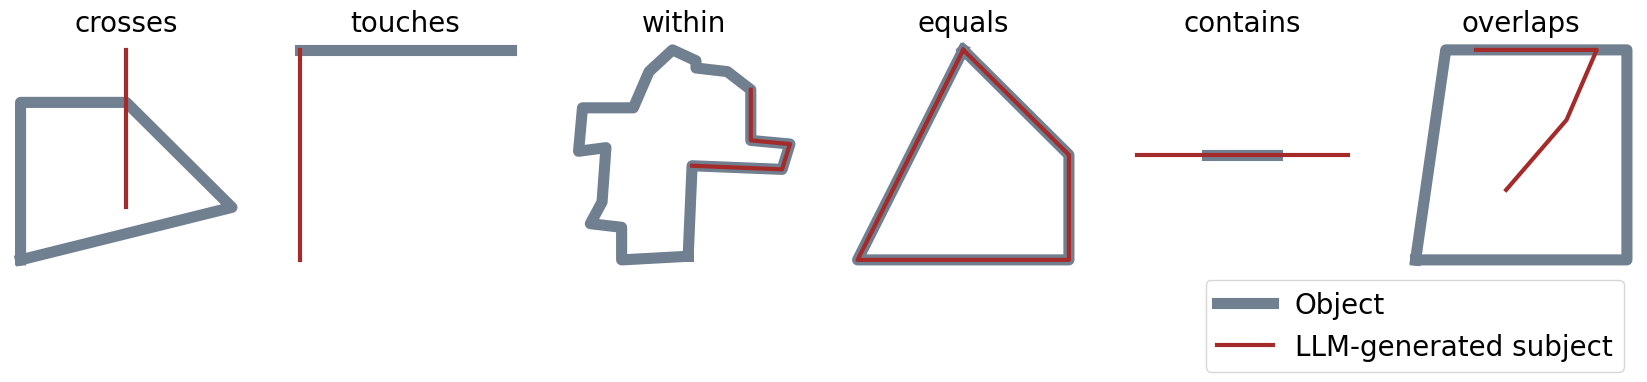

In [86]:
sample_relations = (res_valid[['geometry_x', 'geometry_y', 'label', 'predicate']][(res_valid['geom_type_label']=='LineString')&
 (res_valid['geom_type']=='LineString')&
                                                                                  (res_valid['label']==res_valid['predicate'])]
                    .sample(frac=1, random_state=10) # 0 #10
                    .drop_duplicates(subset='label').reset_index(drop=True))
sample_relations.shape[0]

sample_relations = gpd.GeoDataFrame(sample_relations, geometry='geometry_y', crs=4326)

fig, ax = plt.subplots(1,6, figsize=(21, 3))

for idx in range(sample_relations.shape[0]):


    df_y = sample_relations.iloc[idx:idx+1].get_coordinates()
    df_x = sample_relations.set_geometry('geometry_x').iloc[idx:idx+1].get_coordinates()
    predicate = sample_relations['predicate'].iloc[idx]
    label = sample_relations['label'].iloc[idx]
    # if predicate =='contains':
    #     # zorder1= 20
    #     ax[idx].plot(df_x['x'], df_x['y'], lw=3,  color='brown', label='Pseudo subject')
    #     ax[idx].plot(df_y['x'], df_y['y'], lw=8, color='slategrey', label='Object')
    #     # print(sample_relations.iloc[idx:idx+1])

    # else:
    ax[idx].plot(df_y['x'], df_y['y'], lw=8, color='slategrey', label='Object')
    ax[idx].plot(df_x['x'], df_x['y'], lw=3,  color='brown', label='LLM-generated subject')

    ax[idx].set_title(predicate, {'fontsize':20}, y=1)
    ax[idx].axis('off')

# ax[idx].plot([], [], lw=8, color='slategrey', label='Object')
# ax[idx].plot([], [], lw=3,  color='brown', label='LLM-generated subject')
ax[idx].axis('off')
# ax[1][3].plot([],[], color='slategrey', label='Object')
# ax[1][3].plot([],[], color='brown', label='Pseudo subject')
ax[idx].legend(loc='lower right', bbox_to_anchor=(1, -0.5), fontsize=20)

plt.savefig(path + 'result/final/V1/relations_line_line.png', dpi=300, bbox_inches='tight')

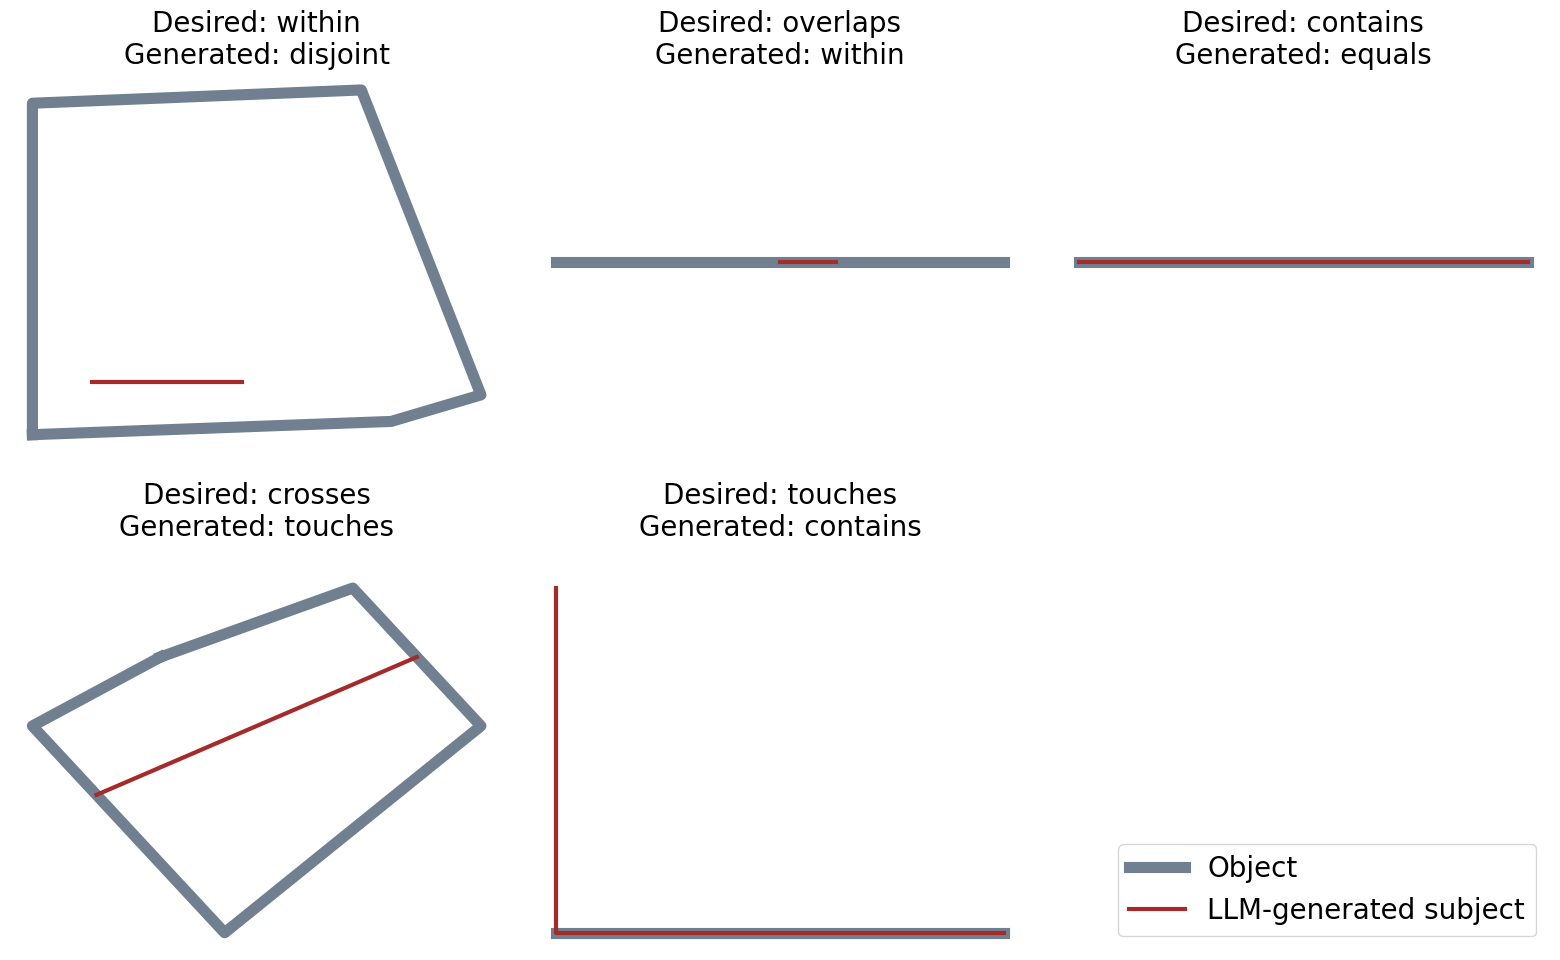

In [46]:

# wrong examples
sample_relations = (res_valid[['geometry_x', 'geometry_y', 'label', 'predicate']][(res_valid['geom_type_label']=='LineString')&
 (res_valid['geom_type']=='LineString')& (res_valid['label']!=res_valid['predicate'])]
                    .sample(frac=1, random_state=100) # 0 #10
                    .drop_duplicates(subset='predicate').reset_index(drop=True))
sample_relations.shape[0]

sample_relations = gpd.GeoDataFrame(sample_relations, geometry='geometry_y', crs=4326)

fig, ax = plt.subplots(2,3, figsize=(16, 10), tight_layout=True)

for idx in range(sample_relations.shape[0]):
    xx = int(idx//3)
    yy = int(idx%3)

    df_y = sample_relations.iloc[idx:idx+1].get_coordinates()
    df_x = sample_relations.set_geometry('geometry_x').iloc[idx:idx+1].get_coordinates()
    predicate = sample_relations['predicate'].iloc[idx]
    label = sample_relations['label'].iloc[idx]
    # if predicate =='contains':
    #     # zorder1= 20
    #     ax[xx][yy].plot(df_x['x'], df_x['y'], lw=3,  color='brown', label='Pseudo subject')
    #     ax[xx][yy].plot(df_y['x'], df_y['y'], lw=8, color='slategrey', label='Object')
    #     # print(sample_relations.iloc[idx:idx+1])

    # else:
    ax[xx][yy].plot(df_y['x'], df_y['y'], lw=8, color='slategrey', label='Object')
    ax[xx][yy].plot(df_x['x'], df_x['y'], lw=3,  color='brown', label='LLM-generated subject')

    ax[xx][yy].set_title('Desired: ' + predicate + '\nGenerated: '+label, {'fontsize':20})
    ax[xx][yy].axis('off')

ax[1][2].plot([], [], lw=8, color='slategrey', label='Object')
ax[1][2].plot([], [], lw=3,  color='brown', label='LLM-generated subject')
ax[1][2].axis('off')
# ax[1][3].plot([],[], color='slategrey', label='Object')
# ax[1][3].plot([],[], color='brown', label='Pseudo subject')
ax[1][2].legend(loc='lower right', fontsize=20)
# ax[1][2].axis('off')

# plt.savefig(path + 'result/final/V1/relations_line_line_wrong.png', dpi=300, bbox_inches='tight')

In [47]:

sample_relations

,geometry_x,geometry_y,label,predicate
0,"LINESTRING (-89.316 43.089, -89.315 43.089)","LINESTRING (-89.3164 43.0886, -89.3164 43.0911...",disjoint,within
1,"LINESTRING (-89.4955 43.0675, -89.4956 43.0675)","LINESTRING (-89.496 43.0675, -89.4952 43.0675)",within,overlaps
2,"LINESTRING (-89.5315 43.003, -89.5316 43.003, ...","LINESTRING (-89.5315 43.003, -89.5319 43.003)",equals,contains
3,"LINESTRING (-89.4102 43.0691, -89.4097 43.0693)","LINESTRING (-89.4101 43.0693, -89.4103 43.0692...",touches,crosses
4,"LINESTRING (-89.5164 43.0606, -89.517 43.0606,...","LINESTRING (-89.5164 43.0606, -89.517 43.0606)",contains,touches


In [48]:
sample_relations['geometry_x'].to_wkt().iloc[-1]

'LINESTRING (-89.5164 43.0606, -89.517 43.0606, -89.517 43.0607)'

In [49]:

sample_relations['geometry_y'].to_wkt().iloc[-1]

'LINESTRING (-89.5164 43.0606, -89.517 43.0606)'

                                      geometry_x  \
4  LINESTRING (-89.5095 43.1012, -89.51 43.1012)   

                                        geometry_y     label predicate  
4  LINESTRING (-89.5095 43.1012, -89.5098 43.1012)  contains  contains  


(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

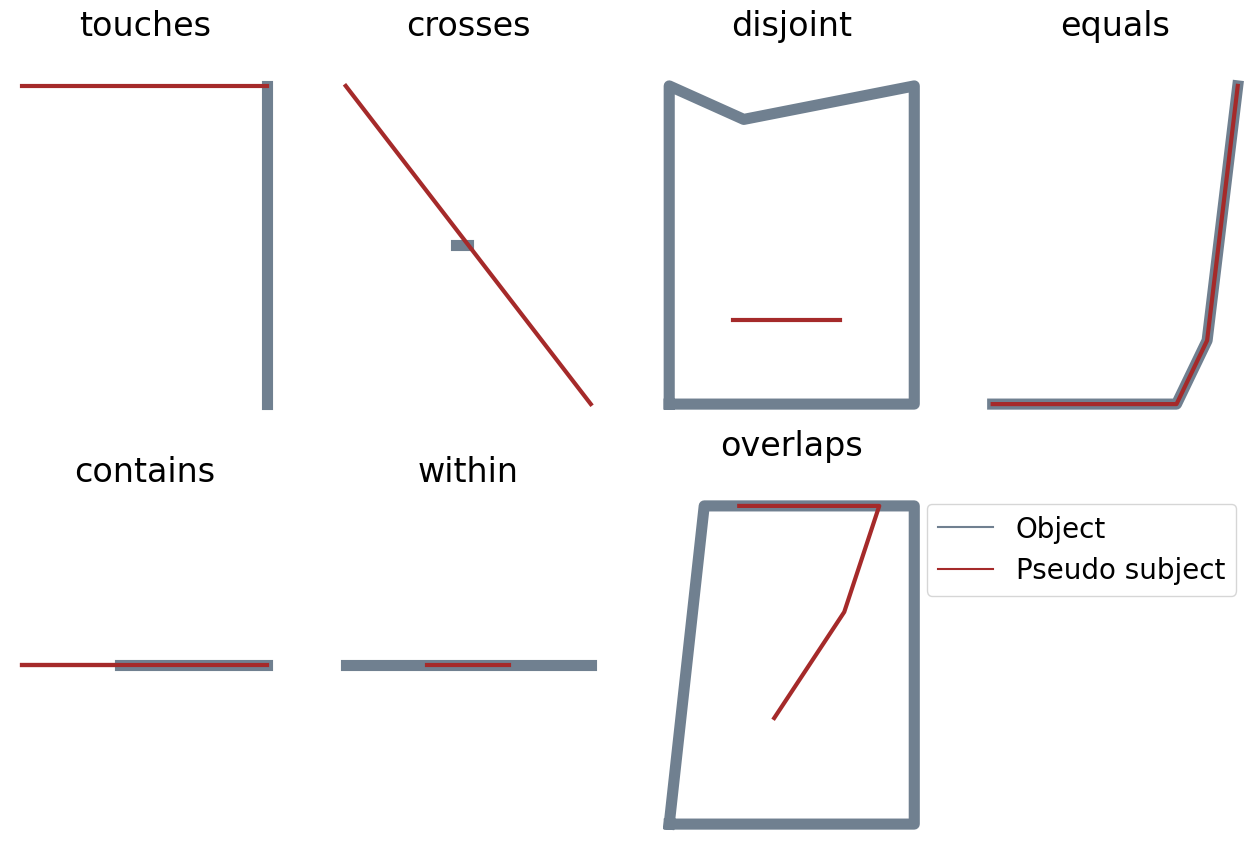

In [50]:
sample_relations = (res_valid[['geometry_x', 'geometry_y', 'label', 'predicate']][(res_valid['geom_type_label']=='LineString')&
 (res_valid['geom_type']=='LineString')]
                    .sample(frac=1, random_state=10) # 0 #10
                    .drop_duplicates(subset='label').reset_index(drop=True))
sample_relations.shape[0]
sample_relations = gpd.GeoDataFrame(sample_relations, geometry='geometry_y', crs=4326)

fig, ax = plt.subplots(2,4, figsize=(16, 10))

for idx in range(sample_relations.shape[0]):
    xx = int(idx//4)
    yy = int(idx%4)

    df_y = sample_relations.iloc[idx:idx+1].get_coordinates()
    df_x = sample_relations.set_geometry('geometry_x').iloc[idx:idx+1].get_coordinates()
    predicate = sample_relations['label'].iloc[idx]
    # bounds = np.array([df_y.total_bounds, df_x.total_bounds])
    # minx, miny, maxx, maxy = bounds.min(axis=0)
    # width = maxx - minx
    # height = maxy - miny
    zorder1 = 4
    zorder2 = 10
    if predicate =='contains':
        # zorder1= 20
        ax[xx][yy].plot(df_x['x'], df_x['y'], lw=3,  color='brown', label='Pseudo subject', zorder=zorder1)
        ax[xx][yy].plot(df_y['x'], df_y['y'], lw=3, color='slategrey', label='Object', zorder=zorder2)
        print(sample_relations.iloc[idx:idx+1])

    # else:
    ax[xx][yy].plot(df_y['x'], df_y['y'], lw=8, color='slategrey', label='Object', zorder=zorder1)
    ax[xx][yy].plot(df_x['x'], df_x['y'], lw=3,  color='brown', label='Pseudo subject', zorder=zorder2)
    # sample_relations.iloc[idx:idx+1].plot(ax=ax[xx][yy], color='slategrey', lw=3, label='Object')
    # sample_relations.set_geometry('geometry_x').iloc[idx:idx+1].plot(ax=ax[xx][yy], color='brown', lw=3, label='Pseudo subject')
    # print(width, height)

    # ax[xx][yy].set_xlim([minx - width*0.02, maxx + width*0.02])
    # ax[xx][yy].set_ylim([miny - height*0.02, maxy + height*0.02])
    ax[xx][yy].set_title(predicate)
    ax[xx][yy].axis('off')

ax[1][3].plot([],[], color='slategrey', label='Object')
ax[1][3].plot([],[], color='brown', label='Pseudo subject')
ax[1][3].legend()
ax[1][3].axis('off')

# plt.savefig(path + 'result/final/V1/relations.png', dpi=300, bbox_inches='tight')

In [70]:
res_valid_closed_line = res_valid[(res_valid['geom_type']=='LineString')&
 (res_valid['label']!=res_valid['predicate'])]
res_valid_closed_line['geometry_y_r'] = res_valid_closed_line['geometry_y'].astype(str).str.replace('LINESTRING', 'POLYGON(') + ')'
res_valid_closed_line['geometry_y_r'] = res_valid_closed_line['geometry_y_r'].apply(lambda s: load_wkt(s))
print(res_valid_closed_line.shape[0], np.sum(res_valid_closed_line['geometry_y_r']!=False))
res_valid_closed_line = res_valid_closed_line[res_valid_closed_line['geometry_y_r']!=False]
res_valid_closed_line = gpd.GeoDataFrame(res_valid_closed_line, geometry='geometry_y_r', crs=4326)
res_valid_closed_line['geom_type_r'] = res_valid_closed_line['geometry_y_r'].geom_type

res_valid_closed_line['label_r'] ='disjoint'
res_valid_closed_line = gpd.GeoDataFrame(res_valid_closed_line, geometry='geometry_y_r', crs=4326)
# res_valid_closed_line['geometry_y_r'] = gpd.GeoSeries(res_valid_closed_line['geometry_x'].tolist())
# i = 0
for rel in predicates:
  f = getattr(res_valid_closed_line['geometry_x'].make_valid(), rel)
  has_rel = f(res_valid_closed_line['geometry_y_r'].make_valid(), align=False)
  if rel!='geom_equals':
      res_valid_closed_line.loc[has_rel, 'label_r'] = rel
  else:
      res_valid_closed_line.loc[has_rel, 'label_r'] = 'equals'

print(np.sum(res_valid_closed_line['predicate']==res_valid_closed_line['label_r']))
res_valid_closed_line = res_valid_closed_line[res_valid_closed_line['predicate']==res_valid_closed_line['label_r']]
res_valid_closed_line.head()

570 391
223


,id,prompt,subjectid,objectid,predicate,geometry_x,geom_type_subject,geometry_y,geom_type_label,geom_type,match_geom_type,label,match,dist,geometry_y_r,geom_type_r,label_r
135,0,zs,node_10580933543,poi_way/28773321,within,POINT (-89.3055 43.1245),Point,"LINESTRING (-89.3061 43.1259, -89.3053 43.1257...",Point,LineString,True,disjoint,False,1,"POLYGON ((-89.3061 43.1259, -89.3053 43.1257, ...",Polygon,within
154,0,zs,node_6090145355,poi_way/1134399595,within,POINT (-89.4521 43.07335),Point,"LINESTRING (-89.452 43.0734, -89.4523 43.0734,...",Point,LineString,True,disjoint,False,1,"POLYGON ((-89.452 43.0734, -89.4523 43.0734, -...",Polygon,within
194,0,zs,node_1202893074,poi_way/44000622,within,POINT (-89.498 43.0152),Point,"LINESTRING (-89.4982 43.015, -89.4977 43.015, ...",Point,LineString,True,disjoint,False,1,"POLYGON ((-89.4982 43.015, -89.4977 43.015, -8...",Polygon,within
195,0,zs,node_10582096838,line_poi_way/1135060525,within,POINT (-89.30385 43.12575),Point,"LINESTRING (-89.3039 43.1258, -89.3038 43.1258...",Point,LineString,True,disjoint,False,1,"POLYGON ((-89.3039 43.1258, -89.3038 43.1258, ...",Polygon,within
196,0,zs,node_10582096834,line_poi_way/1135060525,within,POINT (-89.30385 43.12575),Point,"LINESTRING (-89.3039 43.1258, -89.3038 43.1258...",Point,LineString,True,disjoint,False,1,"POLYGON ((-89.3039 43.1258, -89.3038 43.1258, ...",Polygon,within


In [71]:

res_valid_closed_line[['label', 'predicate', 'label_r']].value_counts()

,,,count
label,predicate,label_r,
disjoint,within,within,209
touches,within,within,6
overlaps,within,within,5
crosses,within,within,2
within,touches,touches,1


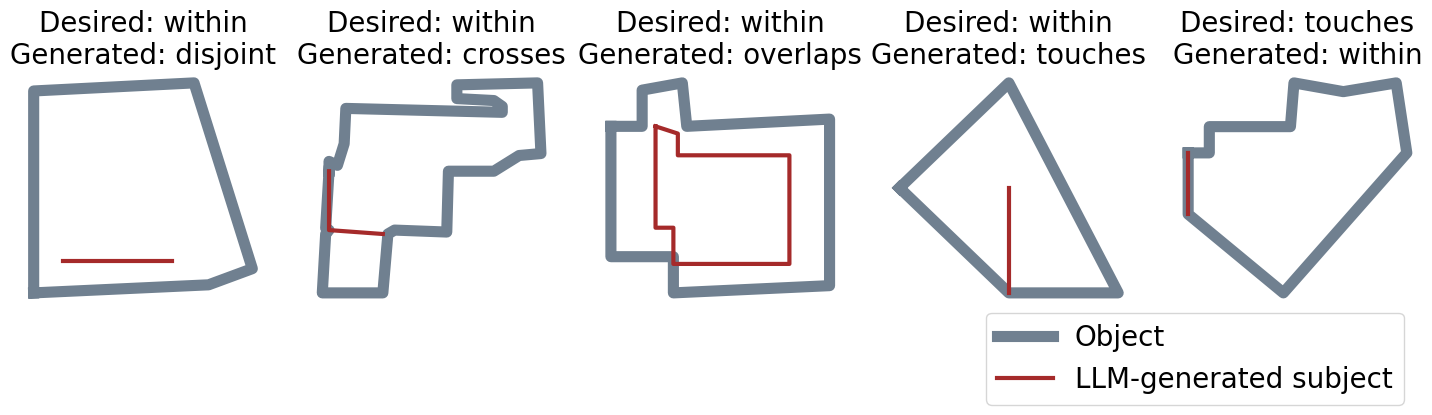

In [72]:
res_valid_closed_line = res_valid_closed_line[res_valid_closed_line['predicate']==res_valid_closed_line['label_r']]
sample_relations = (res_valid_closed_line[['objectid', 'geometry_x', 'geometry_y', 'label', 'predicate', 'label_r']]
                    # .drop_duplicates(subset='objectid')

                    # .drop_duplicates(subset=['objectid', 'predicate'])
                    .sample(frac=1, random_state=0) # 0 #10
                    .drop_duplicates(subset=['label', 'predicate']).reset_index(drop=True))
sample_relations.shape[0]
sample_relations = gpd.GeoDataFrame(sample_relations, geometry='geometry_y', crs=4326)

fig, ax = plt.subplots(1,5, figsize=(18, 3))

for idx in range(sample_relations.shape[0]):


    df_y = sample_relations.iloc[idx:idx+1].get_coordinates()
    df_x = sample_relations.set_geometry('geometry_x').iloc[idx:idx+1].get_coordinates()
    predicate = sample_relations['predicate'].iloc[idx]
    label = sample_relations['label'].iloc[idx]
    # if predicate =='contains':
    #     # zorder1= 20
    #     ax[idx].plot(df_x['x'], df_x['y'], lw=3,  color='brown', label='Pseudo subject')
    #     ax[idx].plot(df_y['x'], df_y['y'], lw=8, color='slategrey', label='Object')
    #     # print(sample_relations.iloc[idx:idx+1])

    # else:
    ax[idx].plot(df_y['x'], df_y['y'], lw=8, color='slategrey', label='Object')
    ax[idx].plot(df_x['x'], df_x['y'], lw=3,  color='brown', label='LLM-generated subject')

    ax[idx].set_title('Desired: ' + predicate + '\nGenerated: '+label, {'fontsize':20},
                      y=1)
    ax[idx].axis('off')

# ax[idx].plot([], [], lw=8, color='slategrey', label='Object')
# ax[idx].plot([], [], lw=3,  color='brown', label='LLM-generated subject')
ax[idx].axis('off')
# ax[1][3].plot([],[], color='slategrey', label='Object')
# ax[1][3].plot([],[], color='brown', label='Pseudo subject')
ax[idx].legend(loc='lower right', bbox_to_anchor=(1, -0.5), fontsize=20)

# for a in ax.flat:
#     a.set_title(a.get_title(), pad=20) # Adjust pad value as needed

plt.savefig(path + 'result/final/V1/relations_closed.png', dpi=300, bbox_inches='tight')

In [58]:
cng = {}
#Point_to_Point
cng["Point_to_Point"]={
    'disjoint':{'equals':1, 'disjoint': 0},
    'equals':{'disjoint':1, 'equals': 0}
}
#Point_to_LineString
cng["Point_to_LineString"]={
    'touches': {'disjoint':1,'touches':0,'within':1},
    'within': {'disjoint':1,'touches':1,'within':0},
    'disjoint':{'disjoint':0,'touches':1,'within':1}
}
#Point_to_Polygon
cng["Point_to_Polygon"]={
    'touches': {'disjoint':1,'touches':0,'within':1},
    'within': {'touches':1,'within':0, 'disjoint':2},
    'disjoint':{'disjoint':0,'touches':1,'within':2 }
}
#LineString_to_Point
cng["LineString_to_Point"]={
    'touches': {'disjoint':1,'touches':0,'contains':1},
    'contains': {'disjoint':1,'touches':1,'contains':0},
    'disjoint':{'disjoint':0,'touches':1,'contains':1}
}
#LineString_to_LineString
cng["LineString_to_LineString"]={
    'touches': {'disjoint':1,'touches':0,'equals':2,'within':1,'contains':1,'overlaps':1,'crosses':1},
    'within': {'disjoint':1,'touches':1,'equals':1,'within':0,'contains':2,'overlaps':1,'crosses':1},
    'disjoint':{'disjoint':0,'touches':1,'equals':1,'within':1,'contains':1,'overlaps':2,'crosses':2},
    'overlaps':{'disjoint':2,'touches':1,'equals':2,'within':1,'contains':1,'overlaps':0,'crosses':1},
    'equals':{'disjoint':1,'touches':2,'equals':0,'within':1,'contains':1,'overlaps':2,'crosses':1},
    'contains':{'disjoint':1,'touches':1,'equals':1,'within':2,'contains':0,'overlaps':1,'crosses':1},
    'crosses':{'disjoint':2,'touches':1,'equals':1,'within':1,'contains':1,'overlaps':1,'crosses':0}
}
#LineString_to_Polygon
cng["LineString_to_Polygon"]={
    'touches': {'disjoint':1,'touches':0,'within':1,'crosses':1},
    'within':  {'disjoint':2,'touches':1,'within':0,'crosses':1},
    'disjoint': {'disjoint':0,'touches':1,'within':2,'crosses':2},
    'crosses': {'disjoint':2,'touches':1,'within':1,'crosses':0}
}
#Polygon_to_Point
cng["Polygon_to_Point"]={
    'touches': {'disjoint':1,'touches':0,'contains':1},
    'contains': {'touches':1,'contains':0, 'disjoint': 2},
    'disjoint':{'disjoint':0,'touches':1, 'contains':2,}
}
#Polygon_to_LineString
cng["Polygon_to_LineString"]={
    'touches': {'disjoint':1,'touches':0,'contains':1,'crosses':1},
    'contains':  {'disjoint':2,'touches':1,'contains':0,'crosses':1},
    'disjoint': {'disjoint':0,'touches':1,'contains':2,'crosses':2},
    'crosses': {'disjoint':2,'touches':1,'contains':1,'crosses':0}
}
#Polygon_to_Polygon
cng["Polygon_to_Polygon"]={
    'touches': {'disjoint':1,'overlaps':1, 'touches': 0, 'equals':3, 'within': 2,'contains': 2},
    'within': {'equals':1,'overlaps':1, 'within':0, 'disjoint':3,'overlaps':1, 'touches': 2,},
    'disjoint':{'touches':1, 'disjoint': 0, 'equals': 4, 'within': 3, 'contains': 3, 'overlaps':2, },
    'overlaps':{'touches':1,'within':1,'contains':1, 'overlaps': 0, 'disjoint': 2, 'equals':2,},
    'equals':{'within':1,'contains':1, 'equals': 0, 'disjoint':4,'overlaps':2, 'touches': 3,},
    'contains':{'equals':1,'overlaps':1, 'contains':0, 'touches':2,'within':2, 'disjoint': 3,}
}

In [59]:
res_valid['match'] = res_valid.apply(lambda row: row['label']==row['predicate'], axis=1)
res_valid['match'].value_counts()

,count
match,
True,3112
False,1038


In [60]:
res_valid['geom_type_subject'] = res_valid['geometry_x'].geom_type
res_valid['geom_type'] = res_valid['geometry_y'].geom_type

In [61]:
res_valid['label'].unique()

array(['contains', 'equals', 'touches', 'overlaps', 'within', 'crosses',
       'disjoint'], dtype=object)

In [62]:
res_valid['dist'] = res_valid.apply(lambda row: cng["%s_to_%s"%(row['geom_type_subject'], row["geom_type"])][row["predicate"]][row['label']], axis=1)

In [63]:
res_valid[['match', 'prompt', 'id',  'dist']].groupby(['prompt', 'id']).apply(lambda df: pd.Series({'match': df['match'].sum()/df.shape[0],
                                                                            'dist': df['dist'][df['match']!=1].mean()})).reset_index().sort_values(by='id')

,prompt,id,match,dist
2,zs,0,0.762,1.142
3,zs_check,1,0.755,1.075
0,fs,2,0.728,1.170
1,fs_neg,3,0.754,1.204


## All performance specifying subject geom_type

In [ ]:
i = 0
for repeat in ["0", "1", "d3", "3"]:
    df = pd.read_csv(path+'result/final/task2/Copy of new_task2_res_q2d_zs_%s.csv'%repeat)
    df['type'] = include_type
    df['id'] = i
    if i==0:
        res = df.copy()

    else:
        res = pd.concat([res, df], axis=0)
    i += 1
res.head()

,index,subjectid,objectid,predicate,idx,rank,dist,list,type,id,Unnamed: 0
0,0.0,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",contains,0,3,0.205,"['road_(5657142535, 53496379)', 'road_(5349637...",t,0,NaN
1,1.0,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",contains,1,1,0.196,"['road_(53496379, 5656899646)', 'road_(5657142...",t,0,NaN
2,2.0,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",contains,2,1,0.211,"['road_(8997363242, 2634716954)', 'road_(26347...",t,0,NaN
3,3.0,poi_way/1134399613,poi_way/1134399612,contains,3,9,0.213,"['poi_way/1134399600', 'poi_way/1134399612', '...",t,0,NaN
4,4.0,parcel_70920121012,poi_way/1134399612,contains,4,311,0.233,"['parcel_60905452335', 'parcel_60905452406', '...",t,0,NaN


In [ ]:
res[['type', 'rank', 'id']].groupby(['type', 'id']).apply(lambda df: pd.Series({
    'MRR': (1./df['rank'].values).mean(),
    'Hits@5': (df['rank']<=5).mean(),
    'Hits@10': (df['rank']<=10).mean(),
    'Hits@20': (df['rank']<=20).mean()
})).sort_values(by='id').reset_index()

,type,id,MRR,Hits@5,Hits@10,Hits@20
0,t,0,0.152,0.212,0.260,0.290
1,t,1,0.180,0.238,0.278,0.328
2,t,2,0.169,0.232,0.280,0.320
3,t,3,0.169,0.233,0.280,0.320


## Object

In [ ]:
i = 0
for qe_mode in ['none', 'q2d_zs']:
  for dir in ["orig", "rev"]:
      df = pd.read_csv(path+'result/final/task2/Copy of task2_object_%s_%s.csv'%(qe_mode, dir))
      # df['type'] = include_type
      df['id'] = i
      if i==0:
          res = df.copy()

      else:
          res = pd.concat([res, df], axis=0)
      i += 1
res.head()

,index,subjectid,objectid,predicate,idx,rank,dist,list,id,Unnamed: 0
0,0.0,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",contains,0,139,0.247,"['road_(5656899646, 53496379)', 'road_(5349637...",0,NaN
1,1.0,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",contains,1,21,0.237,"['road_(53496379, 5656899646)', 'line_road_(41...",0,NaN
2,2.0,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",contains,2,2,0.239,"['road_(8997363242, 2634716954)', 'road_(26347...",0,NaN
3,3.0,poi_way/1134399613,poi_way/1134399612,contains,3,254,0.289,"['poi_way/1134399581', 'poi_way/1134399566', '...",0,NaN
4,4.0,parcel_70920121012,poi_way/1134399612,contains,4,1341,0.293,"['census_550250023012', 'polygon_census_550250...",0,NaN


In [ ]:
res[['rank', 'id']].groupby([ 'id']).apply(lambda df: pd.Series({
    'MRR': (1./df['rank'].values).mean(),
    'Hits@5': (df['rank']<=5).mean(),
    'Hits@10': (df['rank']<=10).mean(),
    'Hits@20': (df['rank']<=20).mean()
})).sort_values(by='id').reset_index()

,id,MRR,Hits@5,Hits@10,Hits@20
0,0,0.105,0.131,0.170,0.211
1,1,0.152,0.219,0.256,0.297
2,2,0.150,0.215,0.261,0.302
3,3,0.179,0.248,0.294,0.333
